![](https://www.listchallenges.com/f/lists/6c536c33-489b-4bee-b259-00074fa53a0d.jpg)

# More To Come. Stay Tuned. !!
If there are any suggestions/changes you would like to see in the Kernel please let me know :). Appreciate every ounce of help!

**This notebook will always be a work in progress**. Please leave any comments about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated!.** If you like it or it helps you , you can upvote and/or leave a comment :).**



In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# More is coming Soon

In [67]:
train_data = pd.read_csv('/mnt/chicm/data/landmark/train/train.csv')
test_data = pd.read_csv('/mnt/chicm/data/landmark/test/test.csv')
submission = pd.read_csv("/mnt/chicm/data/landmark/recognition_sample_submission.csv")

In [69]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)
print("submission data size",submission.shape)

Training data size (4132914, 3)
test data size (117703, 2)
submission data size (117703, 2)


In [79]:
len(set(test_data.id.unique().tolist()) - set(submission.id.unique().tolist()))

0

In [93]:
len(set(test_data.id.unique().tolist()) - set(train_data.id.unique().tolist()))

117703

In [81]:
train_retrieval = pd.read_csv('/mnt/chicm/data/retrieval/train.csv')
test_retrieval = pd.read_csv('/mnt/chicm/data/retrieval/test.csv')
index = pd.read_csv("/mnt/chicm/data/retrieval/index.csv")
sub_retrieval = pd.read_csv("/mnt/chicm/data/retrieval/retrieval_sample_submission.csv")

In [87]:
len(set(test_retrieval.id.unique().tolist()) | set(sub_retrieval.id.unique().tolist()))

117703

In [88]:
set(test_retrieval.id.unique().tolist()) == set(test_data.id.unique().tolist())

True

In [100]:
print(train_retrieval.shape, test_retrieval.shape, index.shape)

(1225029, 3) (117703, 2) (1098461, 2)


In [96]:
len(set(train_retrieval.id.unique().tolist()) & set(train_data.id.unique().tolist()))

0

In [97]:
len(set(train_retrieval.id.unique().tolist()) & set(test_retrieval.id.unique().tolist()))

0

In [101]:
len(set(train_retrieval.id.unique().tolist()) & set(index.id.unique().tolist()))

0

In [103]:
len(train_retrieval.landmark_id.unique())

14952

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np
import pandas as pd
import cv2

In [5]:
train_data.head()

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474


In [6]:
test_data.head()

,id,url
0,cb9998b8cdaf6235,https://lh3.googleusercontent.com/-q8B91vDIQZY...
1,30728cf6e50a6bc6,https://lh3.googleusercontent.com/-91gJSKTgv5Q...
2,16afbc86b710337d,https://lh3.googleusercontent.com/-GHZdXuf2wMg...
3,d29b2166cf522450,https://lh3.googleusercontent.com/-cWDnYNQhyws...
4,dd5c03b20c21cfba,https://lh3.googleusercontent.com/-PSLN6BloM-k...


In [7]:
# now open the URL
temp = 4444
print('id', train_data['id'][temp])
print('url:', train_data['url'][temp])
print('landmark id:', train_data['landmark_id'][temp])

id 3c1138a4a5369aca
url: http://upload.wikimedia.org/wikipedia/commons/7/7f/Interieur%2C_terug_gevonden_fragment_figuratief_reli%C3%ABf_-_Breda_-_20362006_-_RCE.jpg
landmark id: 51856


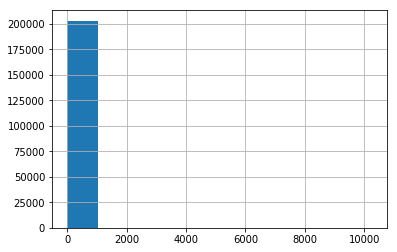

In [8]:
train_data['landmark_id'].value_counts().hist()

In [9]:
# missing data in training data 
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
landmark_id,0,0.0
url,0,0.0
id,0,0.0


In [10]:
# missing data in test data 
total = test_data.isnull().sum().sort_values(ascending = False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending = False)
missing_test_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_test_data.head()

,Total,Percent
url,0,0.0
id,0,0.0


## We can see there is no missing data
## Now Lets see most frequent Landmarks

In [11]:
# Occurance of landmark_id in decreasing order(Top categories)
temp = pd.DataFrame(train_data.landmark_id.value_counts().head(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,138982,10247
1,62798,4333
2,177870,3327
3,176528,3243
4,192931,2627
5,126637,2589
6,83144,2351
7,171772,2268


 ### The most frequent landmark_id is 9633  and the count is 50337.

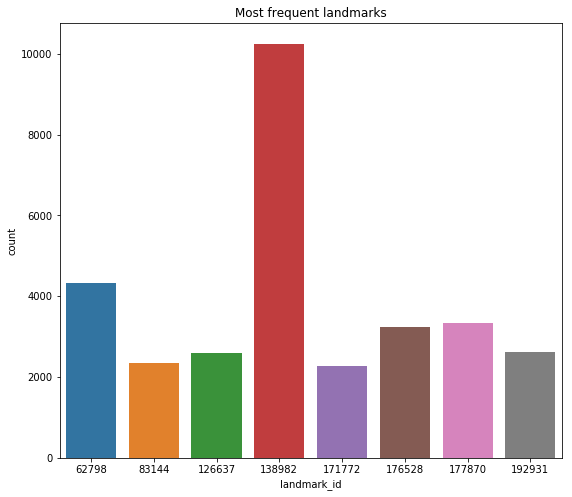

In [12]:
# Plot the most frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

# Create top 1000 classes and training data

In [30]:
top1000_classes = train_data.landmark_id.value_counts().head(1000).index.values
df_1000 = pd.DataFrame(top1000_classes, columns=['classes'])
df_1000.head()


,classes
0,138982
1,62798
2,177870
3,176528
4,192931


In [38]:
df_train_1000 = train_data[train_data.landmark_id.isin(set(top1000_classes))]
df_train_1000.shape

(461568, 3)

In [44]:
df_1000.to_csv('/mnt/chicm/data/landmark/train/top1000_classes.csv', index=False, header=True)

In [39]:
#df_train_1000.reset_index()
df_train_1000.head()

,id,url,landmark_id
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474
11,ccf070a2da242d56,https://upload.wikimedia.org/wikipedia/commons...,138982
23,053d1409647dfba2,https://upload.wikimedia.org/wikipedia/commons...,74821
25,3cdc355c6232712f,https://upload.wikimedia.org/wikipedia/commons...,12877
45,a1b69336f4bf59ce,https://upload.wikimedia.org/wikipedia/commons...,156009


In [40]:
df_train_1000.to_csv('/mnt/chicm/data/landmark/train/train_1000.csv', index=False)

In [43]:
x = zip(list(range(1,10)), range(11,20))
for i, j in x:
    print(i,j)

1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19


# top 5000 classes

In [46]:
top5000_classes = train_data.landmark_id.value_counts().head(5000).index.values
df_5000 = pd.DataFrame(top5000_classes, columns=['classes'])
#df_5000.head()

,classes
0,138982
1,62798
2,177870
3,176528
4,192931


In [47]:
df_train_5000 = train_data[train_data.landmark_id.isin(set(top5000_classes))]
df_train_5000.shape

(1103426, 3)

In [48]:
df_5000.to_csv('/mnt/chicm/data/landmark/train/top5000_classes.csv', index=False, header=True)

In [49]:
df_train_5000.to_csv('/mnt/chicm/data/landmark/train/train_5000.csv', index=False)

# top 10000

In [62]:
top10000_classes = train_data.landmark_id.value_counts().head(10000).index.values
df_10000 = pd.DataFrame(top10000_classes, columns=['classes'])

In [63]:
df_train_10000 = train_data[train_data.landmark_id.isin(set(top10000_classes))]
df_train_10000.shape

(1567821, 3)

In [64]:
df_10000.to_csv('/mnt/chicm/data/landmark/train/top10000_classes.csv', index=False, header=True)
df_train_10000.to_csv('/mnt/chicm/data/landmark/train/train_10000.csv', index=False)

# top 50000

In [52]:
top50000_classes = train_data.landmark_id.value_counts().head(50000).index.values
df_50000 = pd.DataFrame(top50000_classes, columns=['classes'])
df_50000.head()

,classes
0,138982
1,62798
2,177870
3,176528
4,192931


In [53]:
df_train_50000 = train_data[train_data.landmark_id.isin(set(top50000_classes))]
df_train_50000.shape

(3075002, 3)

In [54]:
train_data.shape

(4132914, 3)

In [55]:
df_50000.to_csv('/mnt/chicm/data/landmark/train/top50000_classes.csv', index=False, header=True)
df_train_50000.to_csv('/mnt/chicm/data/landmark/train/train_50000.csv', index=False)

# all classes

In [58]:
top203094_classes = train_data.landmark_id.value_counts().index.values
df_203094 = pd.DataFrame(top203094_classes, columns=['classes'])
print(df_203094.shape)
df_203094.head()

(203094, 1)


,classes
0,138982
1,62798
2,177870
3,176528
4,192931


In [59]:
df_203094.to_csv('/mnt/chicm/data/landmark/train/top203094_classes.csv', index=False, header=True)

## Lets see least frequent landmarks

In [60]:
# Occurance of landmark_id in increasing order
temp = pd.DataFrame(train_data.landmark_id.value_counts().tail(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,22473,1
1,70512,1
2,127852,1
3,134828,1
4,139519,1
5,24520,1
6,17242,1
7,133954,1


### There are many least frequent landmarks whose count is 1

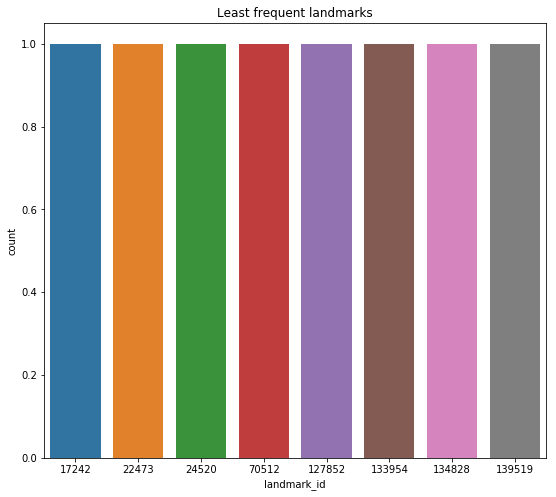

In [61]:
# Plot the least frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

## lets see unique URLs

In [57]:
# Unique URL's
train_data.nunique()

id             4132914
url            4132914
landmark_id     203094
dtype: int64

In [ ]:
#Class distribution
plt.figure(figsize = (10, 8))
plt.title('Category Distribuition')
sns.distplot(train_data['landmark_id'])

plt.show()

In [ ]:
print("Number of classes under 20 occurences",(train_data['landmark_id'].value_counts() <= 20).sum(),'out of total number of categories',len(train_data['landmark_id'].unique()))

## Lets display some images from URLs / Some URLs Visulization 

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

In [ ]:
category = train_data['landmark_id'].value_counts().keys()[0]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")

In [ ]:
category = train_data['landmark_id'].value_counts().keys()[1]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")

# Now Lets extract the website name and see their occurances

In [ ]:
# Extract site_names for train data
temp_list = list()
for path in train_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
train_data['site_name'] = temp_list
# Extract site_names for test data
temp_list = list()
for path in test_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
test_data['site_name'] = temp_list

### We have added one new column "site_name". lets see

In [ ]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)

In [ ]:
train_data.head(8)

In [ ]:
test_data.head()

## occurances of sites in train_data

In [ ]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(train_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

### As we can see there are total 16 unique sites.

In [ ]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

## occurances of sites in test_data

In [ ]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(test_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

### Total unique sites are 25 in test data and some are different from train_data


In [ ]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### As we can see that most of the images are taken from one site only.

##### Referances :
 * https://www.kaggle.com/mxdbld/yadv-simple-exploration-of-google-recognition 
 * https://www.kaggle.com/gpreda/google-landmark-recognition-challenge-eda